In [ ]:
import torch

import matplotlib.pyplot as plt
from PIL import Image 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import shutil
shutil.copy('/content/drive/MyDrive/inteligencia 2/laboratorio 2/dataTrainLab2.zip','ropa.zip')

'ropa.zip'

In [ ]:
shutil.copy('/content/drive/MyDrive/inteligencia 2/laboratorio 2/dataTestLAb2.zip','ropaTest.zip')

'ropaTest.zip'

In [ ]:
shutil.unpack_archive('ropa.zip')

In [ ]:
shutil.unpack_archive('ropaTest.zip')

In [ ]:
import os

In [ ]:
path_train ='/content/dataTrainLab2/'
directorios_train = os.listdir(path_train)
directorios_train

['suit', 'shoes', 'pants']

In [ ]:
labels_def = {'suit':0, 'shoes':1, 'pants':2}

In [ ]:
import numpy as np

In [ ]:
images_train = []
labels_train = []
for d in directorios_train:
   imagenes = os.listdir(path_train + d)
   for i in imagenes:
       imgPath2 = path_train + d + '/' + i
       img1 = Image.open(imgPath2)
       new_img = img1.resize((32,32))
       images_train.append(np.array(new_img)/255)
       labels_train.append(labels_def[d])

In [ ]:
path_test ='/content/dataTestLAb2/'
directorios_test = os.listdir(path_test)
directorios_test

['suit', 'shoes', 'pants']

In [ ]:
images_test = []
labels_test = []
for d in directorios_test:
   imagenes = os.listdir(path_test + d)
   for i in imagenes:
       imgPath2 = path_test + d + '/' + i
       img1 = Image.open(imgPath2)
       new_img = img1.resize((32,32))
       images_test.append(np.array(new_img)/255)
       labels_test.append(labels_def[d])

In [ ]:
X_train = np.asarray(images_train)
y_train_ = np.asarray(labels_train) 
X_train.shape

(7123, 32, 32, 3)

In [ ]:
X_test = np.asarray(images_test)
y_test_ = np.asarray(labels_test) 
X_test.shape

(30, 32, 32, 3)

suit


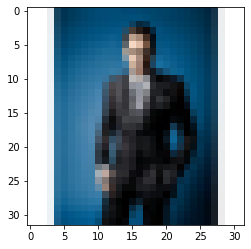

In [ ]:
def getText(label):
    for key in labels_def:
      if labels_def[key] == label:
        print(key)

def printImage(imageId):
  label = y_train_ [imageId]
  plt.imshow(X_train[imageId])
  getText(label)
printImage(800)

In [ ]:
dims = X_train.shape[1] * X_train.shape[2] * X_train.shape[3]
X_train = X_train.reshape(X_train.shape[0], dims)
X_train

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X_train.shape

(7123, 3072)

In [ ]:
dimsTest = X_test.shape[1] * X_test.shape[2] * X_test.shape[3]
X_test = X_test.reshape(X_test.shape[0], dimsTest)
X_test

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# creamos una clase que hereda de `torch.nn.Module`

class Model(torch.nn.Module):
    
    # constructor
    def __init__(self, D_in, H, D_out):
        
        # llamamos al constructor de la clase madre
        super(Model, self).__init__()
        
        # definimos nuestras capas
        self.fc1 = torch.nn.Linear(D_in, H)
        self.relu = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(H, D_out)
        
    # lógica para calcular las salidas de la red
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [ ]:
# función de pérdida y derivada

def softmax(x):
    return torch.exp(x) / torch.exp(x).sum(axis=-1,keepdims=True)

def cross_entropy(output, target):
    logits = output[torch.arange(len(output)), target]
    loss = - logits + torch.log(torch.sum(torch.exp(output), axis=-1))
    loss = loss.mean()
    return loss

In [ ]:
# convertimos datos a tensores y copiamos en gpu
X_t = torch.from_numpy(X_train).float().cuda()
Y_t = torch.from_numpy(y_train_).long().cuda()

In [ ]:
from sklearn.metrics import accuracy_score

def evaluate(x):
    model.eval()
    y_pred = model(x)
    y_probas = softmax(y_pred)
    return torch.argmax(y_probas, axis=1)

In [ ]:
model = Model(3072, 100, 10)
outputs = model(torch.randn(64, 3072))
outputs.shape

torch.Size([64, 10])

In [ ]:
model.to("cuda")
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

epochs = 1000
log_each = 100
l = []
model.train()
for e in range(1, epochs+1): 
    
    # forward
    y_pred = model(X_t)

    # loss
    loss = criterion(y_pred, Y_t)
    l.append(loss.item())
    
    # ponemos a cero los gradientes
    optimizer.zero_grad()

    # Backprop (calculamos todos los gradientes automáticamente)
    loss.backward()

    # update de los pesos
    optimizer.step()
    
    if not e % log_each:
        print(f"Epoch {e}/{epochs} Loss {np.mean(l):.5f}")
        
y_pred = evaluate(torch.from_numpy(X_test).float().cuda())
accuracy_score(y_test_, y_pred.cpu().numpy())

Epoch 10/1000 Loss 1.33747
Epoch 20/1000 Loss 1.11447
Epoch 30/1000 Loss 1.00327
Epoch 40/1000 Loss 0.93197
Epoch 50/1000 Loss 0.88049
Epoch 60/1000 Loss 0.84076
Epoch 70/1000 Loss 0.80878
Epoch 80/1000 Loss 0.78228
Epoch 90/1000 Loss 0.75984
Epoch 100/1000 Loss 0.74051
Epoch 110/1000 Loss 0.72363
Epoch 120/1000 Loss 0.70872
Epoch 130/1000 Loss 0.69543
Epoch 140/1000 Loss 0.68350
Epoch 150/1000 Loss 0.67274
Epoch 160/1000 Loss 0.66364
Epoch 170/1000 Loss 0.65776
Epoch 180/1000 Loss 0.65172
Epoch 190/1000 Loss 0.64521
Epoch 200/1000 Loss 0.63885
Epoch 210/1000 Loss 0.63277
Epoch 220/1000 Loss 0.62699
Epoch 230/1000 Loss 0.62149
Epoch 240/1000 Loss 0.61627
Epoch 250/1000 Loss 0.61131
Epoch 260/1000 Loss 0.60657
Epoch 270/1000 Loss 0.60205
Epoch 280/1000 Loss 0.59773
Epoch 290/1000 Loss 0.59361
Epoch 300/1000 Loss 0.58965
Epoch 310/1000 Loss 0.58586
Epoch 320/1000 Loss 0.58221
Epoch 330/1000 Loss 0.57869
Epoch 340/1000 Loss 0.57531
Epoch 350/1000 Loss 0.57204
Epoch 360/1000 Loss 0.56887
E

0.9333333333333333

In [ ]:
y_pred


tensor([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2,
        2, 2, 2, 2, 2, 2], device='cuda:0')

In [ ]:
y_test_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])